In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold
from scipy.stats import iqr
# k-fold instance for cross validation
kf = KFold(n_splits=10, shuffle=True)

In [2]:
# load data
digits = load_digits()
print(f"Dataset size: {len(digits.data)}")

# filter for digits 1 and 7
mask = (digits.target == 3) | (digits.target == 9)
x_data = digits.data[mask]/digits.data.max()
y_labels = digits.target[mask]
print(f"Filtered dataset size (only label 3 & 9): {len(x_data)}")
mask1 = y_labels == 3
mask2 = y_labels == 9

Dataset size: 1797
Filtered dataset size (only label 3 & 9): 363


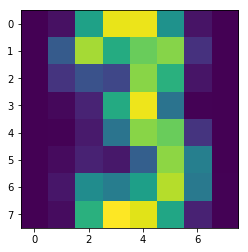

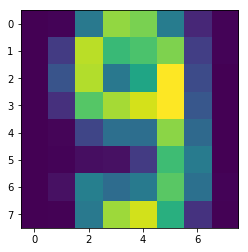

In [3]:
mean1 = np.mean(x_data[mask1], axis=0)
mean2 = np.mean(x_data[mask2], axis=0)
plt.imshow(mean1.reshape(8,8))
plt.figure()
plt.imshow(mean2.reshape(8,8))
# plt.figure(); plt.imshow(diff.reshape(8,8))
# feature_pixels = diff.argsort()[-2:]
# function for data reduction to 2 features
# reduce_dim = lambda x, pixels : x[:,pixels]
def reduce_dim(x):
    out = np.empty((x.shape[0], 2))
    for i in range(x.shape[0]):
        out[i] = np.array( [np.mean(x[i, 24:32]), np.mean(x[i, 32:40])] )
    return out

# reduce all feature data
x_features = reduce_dim(x_data)

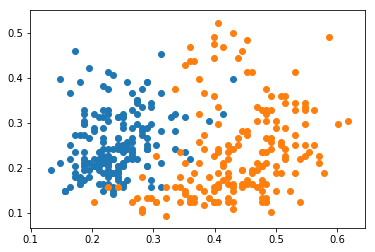

In [4]:
plt.scatter(x_features[mask1,0], x_features[mask1,1])
plt.scatter(x_features[mask2,0], x_features[mask2,1])

## Naive Bayes

## Fitting

In [5]:
def fit_naive_bayes(features, labels, bincount=0):
    possible_labels = np.unique(labels)
    C = len(possible_labels)
    D = features.shape[1]
    
    if bincount == 0:
        for i, label in enumerate(possible_labels):
            mask = labels == label
            range_ = np.max(features[mask], axis=0) - np.min(features[mask], axis=0)
            # Freedman-Diaconis rule
            dx = 2 * iqr(features[mask], axis=0) / features[mask].shape[0]**(1/3)
            binc = int(np.max(np.ceil(range_ / dx)))
            if binc > bincount:
                bincount = binc
    
    histograms = np.empty((C, D, bincount))
    binning = np.empty((C, D, 2))
    
    for i, label in enumerate(possible_labels):
        mask = labels == label
        for j in range(D):
            min_ = np.min(features[mask,j])
            dx = (np.max(features[mask,j]) - min_) / bincount
            binning[i, j] = np.array([min_, dx])
            
            histograms[i,j], _ = np.histogram(features[mask,j], bins=bincount, density=True)
    
    return histograms, binning

## Prediction

In [45]:
def predict_naive_bayes(test_features, histograms, binning, possible_labels=[3,9]):
    scores = np.empty((histograms.shape[0], test_features.shape[0]))
    for k in range(binning.shape[0]):
        bin_indices = np.floor((test_features - binning[k,:,0])/binning[k,:,1]).astype(int)
        bin_indices[bin_indices < 0] = 0
        bin_indices[bin_indices >= histograms.shape[2]] = histograms.shape[2]-1
        probs = np.array([histograms[k, j, bin_indices[:,j]] for j in range(test_features.shape[1])])
        
        scores[k] = np.sum(np.log(probs), axis=0)
    return np.fromiter((possible_labels[k] for k in np.argmax(scores, axis=0)), dtype='int')

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels)
histograms, binning = fit_naive_bayes(x_train, y_train)

In [48]:
predict_naive_bayes(x_test, histograms, binning) == y_test

C:\bin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [9]:
x = binning[0,0,0] + binning[0,0,1] * np.arange(0,histograms.shape[2])

<Container object of 14 artists>

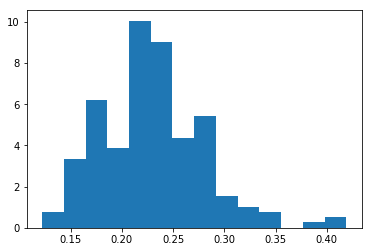

In [10]:
plt.bar(x, histograms[0,0], width=binning[0,0,1])

In [17]:
binning

array([[[ 0.1328125 ,  0.02120536],
        [ 0.140625  ,  0.02287946]],

       [[ 0.203125  ,  0.02957589],
        [ 0.09375   ,  0.03069196]]])

In [41]:
a = np.array([[0.233, 0.231], [0.30, 0.52]])

In [57]:
b = np.floor((a - binning[0,:,0]) / binning[0,:,1]).astype(int)

In [105]:
x_test.shape

(91, 2)

In [65]:
x_test

array([3, 9, 9, 3, 3, 3, 9, 9, 9, 3, 9, 3, 3, 3, 9, 3, 3, 3, 9, 3, 9, 9, 9,
       3, 9, 3, 3, 9, 3, 3, 9, 3, 3, 9, 9, 3, 3, 3, 9, 9, 3, 9, 9, 3, 9, 9,
       3, 3, 3, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 9, 3, 3, 9, 3, 3, 3, 3,
       9, 9, 9, 3, 9, 3, 3, 9, 9, 3, 9, 9, 3, 9, 9, 3, 9, 3, 3, 9, 3, 9, 9,
       9, 9, 9, 9, 3, 9, 3, 9, 9, 9, 9, 9, 3, 3, 3, 3, 9, 9, 9, 3, 3, 3, 9,
       9, 3, 3, 3, 9, 3, 3, 9, 9, 9, 3, 9, 3, 3, 9, 3, 9, 3, 9, 3, 3, 3, 9,
       3, 9, 9, 9, 9, 3, 3, 9, 3, 3, 9, 3, 3, 3, 9, 9, 9, 3, 9, 3, 3, 3, 3,
       9, 3, 3, 3, 9, 9, 9, 9, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3,
       9, 9, 9, 9, 3, 3, 3, 9, 3, 9, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 9, 9,
       9, 9, 3, 3, 9, 9, 3, 9, 9, 9, 9, 3, 9, 3, 3, 9, 9, 9, 9, 3, 9, 3, 9,
       9, 9, 3, 3, 3, 3, 9, 9, 9, 9, 3, 3, 9, 3, 3, 9, 3, 3, 3, 9, 3, 9, 9,
       9, 9, 3, 3, 9, 9, 9, 3, 9, 3, 3, 9, 9, 9, 9, 3, 3, 3, 9])